# Prepare Data
<br>Summary
- Duplicated records were identified and then removed
- For missing values, 73 in 85 columns with missing records. We just worked on feature of work locations this time by replacing the missing values with the most frequent value.<br> For rest of records, it needs further evaluation depending on the specific analysis.
- We modified the feature of compensation by standardise the values in annual dimention.

In [103]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df=pd.read_csv(dataset_url)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [5]:
# under stand the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

#### Check duplicated values

In [9]:
df[df.duplicated(keep=False)]['Respondent'].value_counts()

2392    3
2417    3
2410    3
2343    3
2404    3
       ..
4672    2
4668    2
4659    2
4658    2
4608    2
Name: Respondent, Length: 93, dtype: int64

In [10]:
# we will see an example of duplicated values:
df[df['Respondent']==2392]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1128,2392,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,Web development or web design,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,31.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
1189,2392,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,Web development or web design,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,31.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
1250,2392,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,Web development or web design,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,31.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [12]:
# we will delete the duplicated values as it will impact the analysis
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

#### Check missing values

In [28]:
# return all missing values in for each column
df_null=df.isnull().sum().to_frame()

for i in range(len(df_null.index)):
    if df_null[0][i] != 0:
        print(df_null.index[i],df_null[0][i])

OpenSource 81
Student 51
EdLevel 112
UndergradMajor 737
EduOther 164
OrgSize 96
DevType 65
YearsCode 9
Age1stCode 13
YearsCodePro 16
JobSat 1
MgrIdiot 493
MgrMoney 497
MgrWant 493
LastInt 413
FizzBuzz 37
JobFactors 3
ResumeUpdate 39
CompTotal 809
CompFreq 206
ConvertedComp 816
WorkWeekHrs 122
WorkPlan 121
WorkChallenge 164
WorkRemote 8
WorkLoc 32
ImpSyn 5
CodeRev 1
CodeRevHrs 2426
UnitTests 29
PurchaseHow 196
PurchaseWhat 38
LanguageWorkedWith 11
LanguageDesireNextYear 134
DatabaseWorkedWith 453
DatabaseDesireNextYear 1042
PlatformWorkedWith 411
PlatformDesireNextYear 544
WebFrameWorkedWith 1393
WebFrameDesireNextYear 1617
MiscTechWorkedWith 2182
MiscTechDesireNextYear 1455
DevEnviron 29
OpSys 34
Containers 82
BlockchainOrg 2322
BlockchainIs 2610
BetterLife 98
ITperson 35
OffOn 38
SocialMedia 293
Extraversion 20
ScreenName 507
SOVisit1st 325
SOVisitFreq 5
SOVisitTo 1
SOFindAnswer 3
SOTimeSaved 50
SOHowMuchTime 1917
SOAccount 1
SOPartFreq 1128
SOJobs 6
EntTeams 5
WelcomeChange 85
SONewC

In [162]:
len(df_null[df_null[0]!=0][0])

73

In [30]:
# we will only deal with 'WorkLoc' here, and leave the rest as it is
   #df['WorkLoc'].describe()

# the majority of worklocation is office, so we will fill the null values with OFFICE
df.fillna(value={'WorkLoc':"Office"},inplace=True)
df['WorkLoc'].isnull().sum()

0

#### Check features

In [54]:
# check compensations for example
# delete 809 records with no compensation information available
df_compensation=df[~df['CompTotal'].isnull()]

print(df_compensation['CompTotal'].isnull().sum(),
df_compensation['CompFreq'].isnull().sum())

0 6


In [59]:
# check the records with no compensation frequency available
    #df_compensation[df_compensation['CompFreq'].isnull()]['CompTotal']

# check the examples of monthly payment
    #df_compensation[df_compensation['CompFreq']=='Monthly']['CompTotal'].head(20)

# there is no enough information to determine its frequency type, so we will delete them for analysis
df_compensation=df_compensation[~df_compensation['CompFreq'].isnull()]
df_compensation['CompFreq'].isnull().sum()

0

In [60]:
df_compensation['CompTotal'].dtypes

dtype('float64')

In [101]:
# get the annual salary for all records for further analysis
salary=[]

for freqtype,money in zip(df_compensation['CompFreq'],df_compensation['CompTotal']):
    if freqtype == 'Yearly':
        salary.append(money)
    elif freqtype == 'Monthly':
        salary.append(money*12)
    else:
        salary.append(money*52)
df_compensation['NormalizedAnnualCompensation']=salary
df_compensation.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0


# EDA
<br>Summary
- It shows that the annual compensation is positively skewed with 15% of values are recognised as outliers.
- The overall median value is 100000, with specifically man of 100000 and woman of 89000.
- For feature of age, the distribution is also positively skewed, with median value of 29. <br>
There is no obvious correlation between age and other numerical features. 

#### How annual compensations distribute

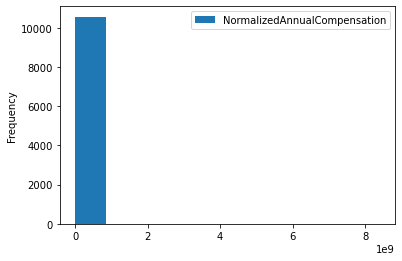

In [106]:
df_compensation[['NormalizedAnnualCompensation']].plot.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x200f0d66850>,
 'caps': [<matplotlib.lines.Line2D at 0x200f0d66f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x200f0d664f0>],
 'medians': [<matplotlib.lines.Line2D at 0x200f0d76640>],
 'fliers': [<matplotlib.lines.Line2D at 0x200f0d76940>],
 'means': []}

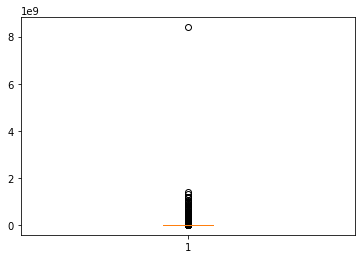

In [108]:
plt.boxplot(df_compensation['NormalizedAnnualCompensation'])

It shows that the annual salary is positively skewed distribution <br>
so median value would make more sense than mean values.

In [110]:
df_compensation['NormalizedAnnualCompensation'].describe()

count    1.058300e+04
mean     6.136037e+06
std      9.840938e+07
min      0.000000e+00
25%      5.200000e+04
50%      1.000000e+05
75%      3.600000e+05
max      8.400000e+09
Name: NormalizedAnnualCompensation, dtype: float64

In [135]:
# we then find the outliers for the compensations
IQR=df_compensation['NormalizedAnnualCompensation'].quantile(q=0.75)-df_compensation['NormalizedAnnualCompensation'].quantile(q=0.25)
upper=IQR*1.5+df_compensation['NormalizedAnnualCompensation'].quantile(q=0.75)
lower=df_compensation['NormalizedAnnualCompensation'].quantile(q=0.25)-1.5*IQR
print(upper,lower)
print('There are','{:.1%}'.format(round(df_compensation[df_compensation['NormalizedAnnualCompensation']>upper]['NormalizedAnnualCompensation'].count()/df_compensation.shape[0],2)),
      'are outliers')

822000.0 -410000.0
There are 15.0% are outliers


#### Take gender into consideration

In [114]:
print(df_compensation['Gender'].value_counts(),'\n',
df_compensation['Gender'].isnull().sum())

Man                                                            9726
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64 
 70


In [118]:
# delete records without gender information
df_gender_com=df_compensation[~df_compensation['Gender'].isnull()]
df_gender_com.groupby(['Gender']).agg({'NormalizedAnnualCompensation':'median'})

,NormalizedAnnualCompensation
Gender,
Man,100000.0
"Man;Non-binary, genderqueer, or gender non-conforming",75000.0
"Non-binary, genderqueer, or gender non-conforming",79200.0
Woman,89000.0
Woman;Man,360000.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",111650.0
"Woman;Non-binary, genderqueer, or gender non-conforming",85000.0


It shows that woman earn less than man in terms of median salary.

#### Explore feature of Age

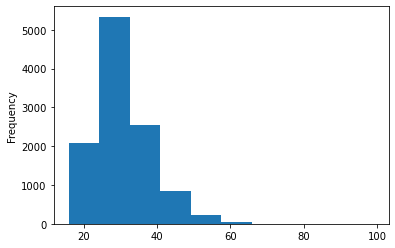

In [143]:
df['Age'].isnull().sum()

# delete the records without age information for further analysis
df_age=df[~df['Age'].isnull()]
df_age['Age'].plot(kind='hist')

It shows that age is a positively skewed distribution<br>
we will use median to describe the average standard.

In [144]:
# get the median value
df_age['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [158]:
# See how other numerical features correlated with age
df_age_compensation=pd.merge(df_age,df_compensation[['Respondent','NormalizedAnnualCompensation']],how='inner',on='Respondent')
df_age_compensation.corr()['Age']

Respondent                      0.002475
CompTotal                       0.006953
ConvertedComp                   0.105386
WorkWeekHrs                     0.031595
CodeRevHrs                     -0.015792
Age                             1.000000
NormalizedAnnualCompensation   -0.005222
Name: Age, dtype: float64

It does not show any numerical features have obvious correlations with Age.

In [168]:
# save the file
df=pd.merge(df,df_compensation[['Respondent','NormalizedAnnualCompensation']],how='left',on='Respondent')
df.shape

(11398, 86)

In [169]:
df.to_csv('stack_survey_data_cleaned.csv')